In [7]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

cal_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

UsageError: Line magic function `%tensorflow_version` not found.


In [13]:
def preprocess_features(cal_housing_dataframe):
    selected_features = cal_housing_dataframe[
        ["latitude",
         "longitude",
         "housing_median_age",
         "total_rooms",
         "total_bedrooms",
         "population",
         "households",
         "median_income",]]
    
    processed_features = selected_features.copy()
    
    processed_features["rooms_per_person"]=(
        cal_housing_dataframe["total_rooms"]/
        cal_housing_dataframe["population"])
    return  processed_features

def preprocess_targets(cal_housing_dataframe):
    output_targets = pd.DataFrame()
    
    output_targets["median_house_value"] = (
        cal_housing_dataframe["median_house_value"]/1000.0)
    return output_targets

In [14]:
cal_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
training_examples = preprocess_features(cal_housing_dataframe.head(12000))
training_examples

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
0,34.19,-114.31,15.0,5612.0,1283.0,1015.0,472.0,1.4936,5.529064
1,34.40,-114.47,19.0,7650.0,1901.0,1129.0,463.0,1.8200,6.775908
2,33.69,-114.56,17.0,720.0,174.0,333.0,117.0,1.6509,2.162162
3,33.64,-114.57,14.0,1501.0,337.0,515.0,226.0,3.1917,2.914563
4,33.57,-114.57,20.0,1454.0,326.0,624.0,262.0,1.9250,2.330128
5,33.63,-114.58,29.0,1387.0,236.0,671.0,239.0,3.3438,2.067064
6,33.61,-114.58,25.0,2907.0,680.0,1841.0,633.0,2.6768,1.579033
7,34.83,-114.59,41.0,812.0,168.0,375.0,158.0,1.7083,2.165333
8,33.61,-114.59,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,1.528079
9,34.83,-114.60,46.0,1497.0,309.0,787.0,271.0,2.1908,1.902160


In [16]:
training_targets = preprocess_targets(cal_housing_dataframe.head(12000))
training_targets.describe()

,median_house_value
count,12000.000000
mean,198.037593
std,111.857499
min,14.999000
25%,117.100000
50%,170.500000
75%,244.400000
max,500.001000


In [17]:
validation_examples = preprocess_features(cal_housing_dataframe.tail(5000))
validation_examples.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,38.050778,-122.182510,31.27980,2614.821400,521.059600,1318.13460,491.232400,4.096053,2.078781
std,0.923030,0.480337,13.38939,1979.620397,388.452096,1073.74575,366.523912,2.021218,0.638113
min,36.140000,-124.350000,1.00000,8.000000,1.000000,8.00000,1.000000,0.499900,0.135721
25%,37.490000,-122.400000,20.00000,1481.000000,292.000000,731.00000,278.000000,2.690900,1.749190
50%,37.790000,-122.140000,31.00000,2164.000000,424.000000,1074.00000,403.000000,3.728450,2.066278
75%,38.370000,-121.910000,42.00000,3161.250000,635.000000,1590.25000,603.000000,5.064100,2.375372
max,41.950000,-121.390000,52.00000,32627.000000,6445.000000,28566.00000,6082.000000,15.000100,18.255319


In [18]:
validation_targets = preprocess_targets(cal_housing_dataframe.tail(5000))
validation_targets.describe

<bound method DataFrame.describe of        median_house_value
12000               126.2
12001               154.3
12002                92.0
12003               237.6
12004               146.9
12005               107.2
12006               107.0
12007                98.7
12008               130.4
12009               113.2
12010               118.8
12011               156.8
12012               297.6
12013               327.8
12014               142.5
12015               142.4
12016                67.5
12017               106.3
12018               130.6
12019               322.4
12020               145.4
12021               157.3
12022               136.5
12023               155.3
12024               207.9
12025                90.3
12026                87.5
12027                87.2
12028               105.2
12029                66.8
...                   ...
16970                75.5
16971                62.5
16972                70.5
16973                68.3
16974                81.3
16

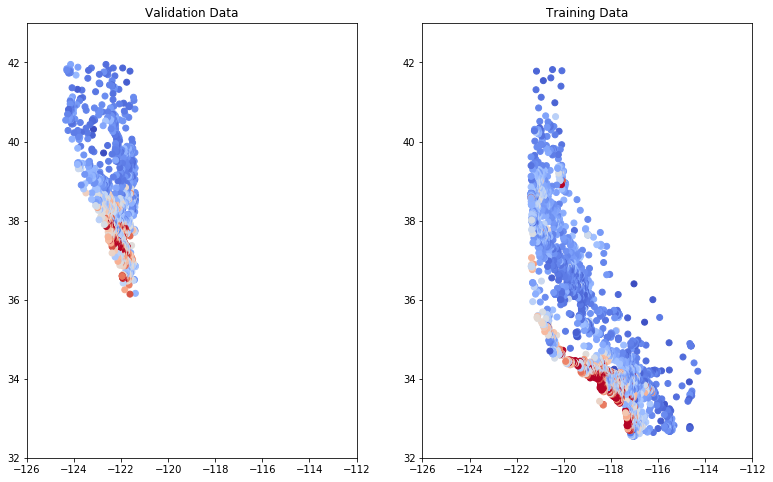

In [19]:
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(validation_examples["longitude"],
            validation_examples["latitude"],
            cmap="coolwarm",
            c=validation_targets["median_house_value"] / validation_targets["median_house_value"].max())

ax = plt.subplot(1,2,2)
ax.set_title("Training Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(training_examples["longitude"],
            training_examples["latitude"],
            cmap="coolwarm",
            c=training_targets["median_house_value"] / training_targets["median_house_value"].max())
_ = plt.plot()

In [ ]:
def input_fn(features, targets, batch_size = 1, shuffle=True, num_epochs=None):
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    